In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from Bio import SeqIO
import logomaker as lm
import gzip
import pickle

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5
# plt.rcParams['axes.facecolor']='#EEEEEE'

In [2]:
codontab = {
    'TCA': 'S', 'TCC': 'S', 'TCG': 'S', 'TCT': 'S',
    'TTC': 'F', 'TTT': 'F',
    'TTA': 'L', 'TTG': 'L', 'CTA': 'L', 'CTC': 'L', 'CTG': 'L','CTT': 'L',
    'TAC': 'Y', 'TAT': 'Y',
    'TAA': '*', 'TAG': '*', 'TGA': '*',
    'TGC': 'C', 'TGT': 'C',
    'TGG': 'W',
    'CCA': 'P', 'CCC': 'P', 'CCG': 'P', 'CCT': 'P',
    'CAC': 'H', 'CAT': 'H',
    'CAA': 'Q', 'CAG': 'Q',
    'CGA': 'R', 'CGC': 'R', 'CGG': 'R','CGT': 'R', 'AGA': 'R', 'AGG': 'R',
    'ATA': 'I', 'ATC': 'I', 'ATT': 'I',
    'ATG': 'M',
    'ACA': 'T', 'ACC': 'T', 'ACG': 'T', 'ACT': 'T',
    'AAC': 'N', 'AAT': 'N',
    'AAA': 'K', 'AAG': 'K',
    'AGC': 'S', 'AGT': 'S',
    'GTA': 'V', 'GTC': 'V', 'GTG': 'V', 'GTT': 'V',
    'GCA': 'A', 'GCC': 'A', 'GCG': 'A', 'GCT': 'A',
    'GAC': 'D', 'GAT': 'D',
    'GAA': 'E', 'GAG': 'E',
    'GGA': 'G', 'GGC': 'G', 'GGG': 'G', 'GGT': 'G'
}

In [3]:
transcript_FASTA_path = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Data_Library/FASTA/gencode.vM27.pc_transcripts.fa.gz'
tmp = SeqIO.to_dict(SeqIO.parse(gzip.open(transcript_FASTA_path, mode='rt'), 'fasta'))

T_fa = {}
for ID in tmp:
    T_fa[ID.split('.')[0]] = tmp[ID]

In [4]:
with open(f'{Project}/Results/Tables/Ribosome_stalling/v20230730/adi_stall-score.df.pickle',"rb") as fr: stalling_score = pickle.load(fr)
stalling_score['transcript_id'] = stalling_score['transcript_id'].str.split('.').str[0]
stalling_score = stalling_score.replace(0, np.nan).dropna()

for day in ['0','4','8']:
    stalling_score[f'D{day}'] = stalling_score[[f'D{day}{rep}' for rep in ['a','b','c']]].mean(axis=1)

asite_codon = []
ext5, ext3 = 15+6, 12+6
bands = []
bands_AA = []
for T_ID, asite_pos in zip(stalling_score['transcript_id'], stalling_score['asite']):
    asite_codon.append(str(T_fa[T_ID].seq[asite_pos:asite_pos+3]).replace('T','U'))
    band = str(T_fa[T_ID].seq[asite_pos-ext5:asite_pos+3+ext3]).replace('T','U')
    bands.append(band)
    bands_AA.append(''.join([codontab[band[i:i+3].replace('U','T')] for i in range(0, len(band), 3)]))
    

stalling_score['codon-asite_confirm'] = asite_codon
stalling_score[f'Nearby_Seq_-{ext5}_+{ext3+2}'] = bands
stalling_score[f'Nearby_Seq_-{ext5}_+{ext3+2}_AA'] = bands_AA

if sum(stalling_score['codon-asite'] == stalling_score['codon-asite_confirm']) == len(stalling_score) : 
    print('No A-site codon discrepancy checked.')
else:
    print('Warning : A-site codon discrepancy.')

display(stalling_score)

No A-site codon discrepancy checked.


,transcript_id,asite,reltostart-asite,codon-asite,aa-asite,D0a,D0b,D0c,D4a,D4b,D4c,D8a,D8b,D8c,D0,D4,D8,codon-asite_confirm,Nearby_Seq_-21_+20,Nearby_Seq_-21_+20_AA
6,ENSMUST00000000001,195,54,AUC,I,1.876404,1.591739,5.703044,2.955752,0.824691,1.796907,3.290640,1.739583,2.312308,3.057063,1.859117,2.447510,AUC,GCGGUGGAGCGGAGCAAGAUGAUCGACCGCAACUUGCGGGAG,AVERSKMIDRNLRE
7,ENSMUST00000000001,198,57,GAC,D,1.876404,1.591739,0.991834,0.268705,1.237037,0.673840,0.658128,1.159722,0.770769,1.486659,0.726527,0.862873,GAC,GUGGAGCGGAGCAAGAUGAUCGACCGCAACUUGCGGGAGGAC,VERSKMIDRNLRED
9,ENSMUST00000000001,204,63,AAC,N,3.987360,1.326450,4.711210,5.642800,0.824691,2.470746,0.658128,0.579861,1.027692,3.341673,2.979413,0.755227,AAC,CGGAGCAAGAUGAUCGACCGCAACUUGCGGGAGGACGGGGAG,RSKMIDRNLREDGE
10,ENSMUST00000000001,213,72,GAG,E,3.049157,2.652899,3.471418,2.149638,2.474074,2.695360,1.974384,2.899306,1.798462,3.057825,2.439691,2.224050,GAG,AUGAUCGACCGCAACUUGCGGGAGGACGGGGAGAAAGCGGCC,MIDRNLREDGEKAA
13,ENSMUST00000000001,228,87,GCG,A,1.641854,1.326450,4.711210,0.806114,0.824691,2.695360,2.303448,2.899306,5.652308,2.559838,1.442055,3.618354,GCG,UUGCGGGAGGACGGGGAGAAAGCGGCCAAAGAAGUGAAGCUG,LREDGEKAAKEVKL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024950,ENSMUST00000239525,10109,9978,GAG,E,7.105894,12.158446,6.512629,5.410881,3.658754,4.345818,3.622268,7.712703,1.497849,8.592323,4.471818,4.277607,GAG,ACCUCUGAUGAGGAGCCCGCAGAGAUUCUUGAGUUUCCUGAG,TSDEEPAEILEFPE
1024957,ENSMUST00000239525,10139,10008,GAG,E,15.544144,9.210944,7.598067,13.527202,9.146886,14.775780,5.433403,5.141802,1.497849,10.784385,12.483290,4.024351,GAG,GAGUUUCCUGAGGACAGCCAGGAGGUUAAGGUCUCUGGCAUG,EFPEDSQEVKVSGM
1024966,ENSMUST00000239525,10184,10053,AAA,K,2.664710,2.210627,3.527674,13.527202,8.232198,5.214981,16.300208,10.283604,23.965577,2.801004,8.991460,16.849796,AAA,ACAAAACAGAAACCAGAAGGUAAAAAGGCCAGCCUGUUGUGG,TKQKPEGKKASLLW
1025016,ENSMUST00000239525,10442,10311,GAG,E,1.776474,2.579064,0.542719,3.607254,0.304896,0.869164,3.622268,10.283604,1.497849,1.632752,1.593771,5.134574,GAG,CAGGAAGAGCACAAGCCCCAGGAGGAGACAGUCACCUUUUUU,QEEHKPQEETVTFF


---

In [5]:
logo_dict = {}
for day in ['0','4','8']:
    tmp = stalling_score.sort_values(f'D{day}', ascending=False)[:(len(stalling_score)//100)*5]

    AA_seq_table = pd.DataFrame()
    for i in range(len(tmp.iloc[0,-1])):
        AA_seq_table[i] = tmp[f'Nearby_Seq_-{ext5}_+{ext3+2}_AA'].str[i]

    tmp_list = []
    for i in AA_seq_table:
        tmp_list.append(AA_seq_table[i].value_counts())
    AA_seq_count = pd.concat(tmp_list, axis=1).drop(index='*', errors='ignore').replace(np.nan, 0)
    AA_seq_count = AA_seq_count.sort_index().T
    
    logo_dict[day] = lm.transform_matrix(AA_seq_count, from_type='counts', to_type='information')

    # BG_AA_seq_table = pd.DataFrame()
    # for i in range(len(stalling_score.iloc[0,-1])):
    #     BG_AA_seq_table[i] = stalling_score['Nearby_Seq_-15_+14_AA'].str[i]
    # logo_dict[day] = lm.transform_matrix(AA_seq_count, from_type='counts', to_type='weight', background=pd.DataFrame({'AA':BG_AA_seq_table.stack().to_list()}).AA.value_counts(normalize=True).drop('*').sort_index().to_list())


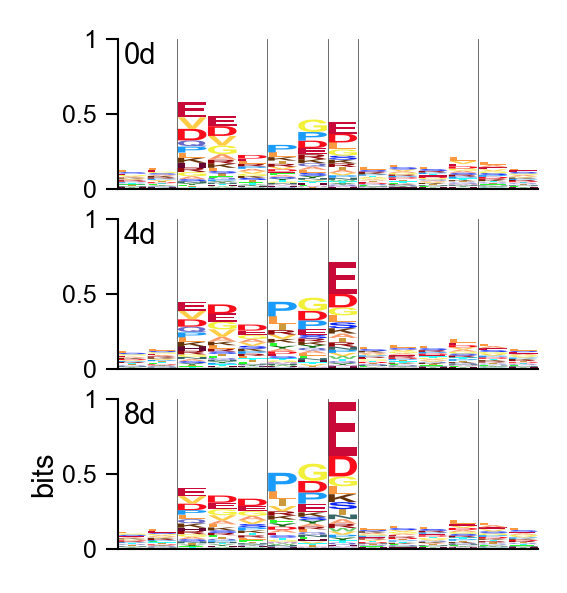

In [7]:
sF = 1 # Size factor
wgap = 0.1
hgap = 0.1
nrow, ncol = 3, 1

width_ratios = [1.4]
height_ratios = [0.5, 0.5, 0.5]

fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF
fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    width_ratios=width_ratios,
                    height_ratios=height_ratios,
                    wspace=wgap/np.average(width_ratios), 
                    hspace=hgap/np.average(height_ratios),
                    left=0, right=1, bottom=0, top=1)

row = 0
col = 0
for day in logo_dict:
    ax = fig.add_subplot(grid[row,col])

    RPF_start = 2
    # ax.axvspan(RPF_start-0.5,   RPF_start-0.5+10, 0, 1, color='#E5E5E5', lw=0, zorder=-1)
    # ax.axvspan(RPF_start-0.5+3, RPF_start-0.5+6, 0, 1,  color='#D5D5D5', lw=0, zorder=-1)
    # ax.axvspan(RPF_start-0.5+5, RPF_start-0.5+6, 0, 1,  color='#BBBBBB', lw=0, zorder=-1)
    ax.axvline(RPF_start-0.5,    c='#555555', lw=0.2)
    ax.axvline(RPF_start-0.5+3,  c='#555555', lw=0.2)
    ax.axvline(RPF_start-0.5+5,  c='#555555', lw=0.2)
    ax.axvline(RPF_start-0.5+6,  c='#555555', lw=0.2)
    ax.axvline(RPF_start-0.5+10, c='#555555', lw=0.2)

    lm.Logo(logo_dict[day],
            color_scheme='skylign_protein',
            font_name='Arial',
            ax=ax)
    ax.text(0.015, 0.98, f'{day}d', transform=ax.transAxes, ha='left', va='top', fontsize=7)
    
    ax.set_ylim(0, 1)
    ax.set_xticks([])
    ax.set_yticks([0, 0.5, 1])
    ax.set_yticklabels([0, 0.5, 1])
    ax.tick_params(length=3, width=0.5, pad=2)
    if row!=(nrow-1) : ax.set_xticklabels([])

    if row==(nrow-1): 
        ax.set_xlabel('', labelpad=1)
        ax.set_ylabel('bits', labelpad=1)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    # ax.spines['left'].set_visible(False)

    row+=1

plt.savefig('adi_top-stalling-score_SeqLogo.pdf', bbox_inches='tight')
plt.show()
plt.close()